In [1]:
%pip install -U scikit-fuzzy


[notice] A new release of pip available: 22.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install gymnasium


[notice] A new release of pip available: 22.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import skfuzzy as fuzz
import gymnasium as gym
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

c:\Users\Navid\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


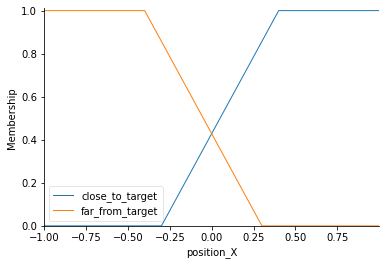

In [81]:
position_X = ctrl.Antecedent(np.arange(-1, 1, 0.001), 'position_X')

position_X['close_to_target'] = fuzz.trapmf(position_X.universe, [-0.3, 0.4, 1, 1])
position_X['far_from_target'] = fuzz.trapmf(position_X.universe, [-1, -1, -0.4, 0.3])

position_X.view()

c:\Users\Navid\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


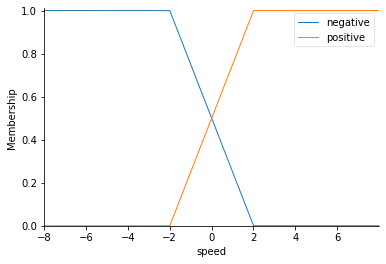

In [82]:
speed = ctrl.Antecedent(np.arange(-8, 8, 0.0001), 'speed')

speed['negative'] = fuzz.trapmf(speed.universe, [-8, -8, -2, 2])
speed['positive'] = fuzz.trapmf(speed.universe, [-2, 2, 8, 8])

speed.view()

c:\Users\Navid\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


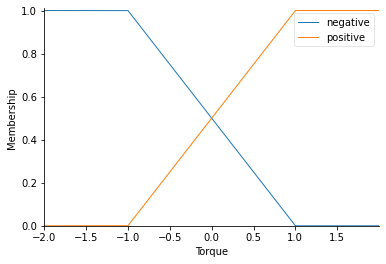

In [74]:
Torque = ctrl.Consequent(np.arange(-2, 2, 0.001), 'Torque')

Torque['negative'] = fuzz.trapmf(Torque.universe, [-2, -2, -1, 1])
Torque['positive'] = fuzz.trapmf(Torque.universe, [-1, 1, 2, 2])

Torque.view()

In [83]:
rule1 = ctrl.Rule(position_X['close_to_target'] & speed['negative'], Torque['positive'])
rule2 = ctrl.Rule(position_X['far_from_target'] & speed['negative'], Torque['negative'])
rule3 = ctrl.Rule(position_X['close_to_target'] & speed['positive'], Torque['negative'])
rule4 = ctrl.Rule(position_X['far_from_target'] & speed['positive'], Torque['positive'])

In [84]:
controller = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
simulator = ctrl.ControlSystemSimulation(controller)

In [90]:
env = gym.make('Pendulum-v1', g=9.81, render_mode="human")
#gym.make("MountainCarContinuous-v0", render_mode="human")

observation, _ = env.reset()
rewards = []
for _ in range(500):
    simulator.input['position_X'] = observation[0]
    simulator.input['speed'] = observation[2]
    simulator.compute()
    decision = simulator.output['Torque']

    observation, reward, terminated, truncated, info = env.step([decision])
    rewards.append(reward)
    
    # Make it easier
    if observation[0] >= 0.99 and abs(observation[2]) <= 1.5:
        terminated=True
    
    env.render()
    
    if terminated:
        print(f'You Win in {_} iteration!')
        break

env.close()

You Win in 93 iteration!


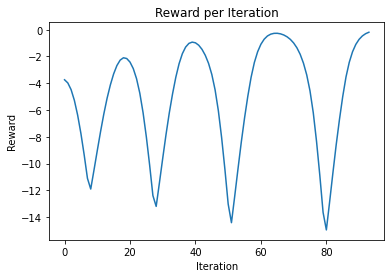

In [91]:
plt.plot(rewards)
plt.xlabel('Iteration')
plt.ylabel('Reward')
plt.title('Reward per Iteration')
plt.show()